In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# wav 파일 로드
audio_path = "에.wav"

# 음성 데이터 로드
y, sr = librosa.load(audio_path) #y는 진폭을, sr은 sampling rate를 의미

# FFT를 위한 파라미터 설정
n_fft = 2048  # FFT 크기
hop_length = 512  # 프레임 간격

# 주파수 분석을 위한 STFT 계산
D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

# 주파수 축 생성
frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

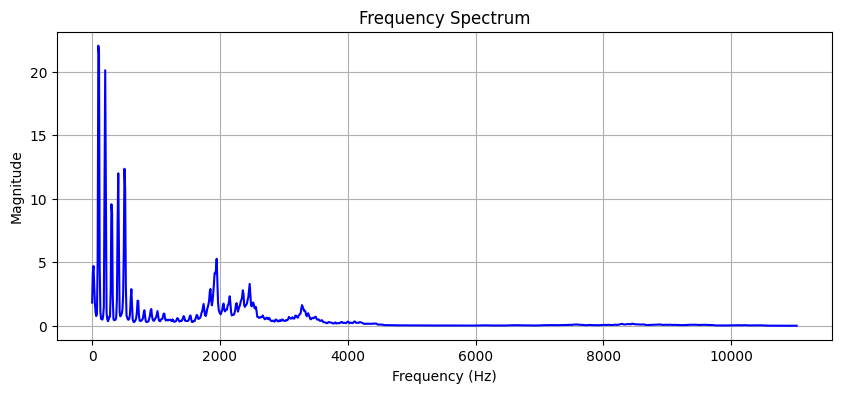

In [3]:
# 스펙트럼 시각화
plt.figure(figsize=(10, 4))
plt.plot(frequencies, np.mean(D, axis=1), color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

In [4]:
# wav 파일 로드
audio_path = "자기인사.wav"

# 음성 데이터 로드
y, sr = librosa.load(audio_path)

# STFT를 위한 파라미터 재설정
n_fft = 4096  # FFT 크기
win_length = 512  # 윈도우 길이
hop_length = 1024  # 프레임 간격

# STFT 계산
stft_result = librosa.stft(y, n_fft=n_fft, win_length=win_length, hop_length=hop_length)
D = np.abs(stft_result)

In [5]:
# 스펙트로그램 변환
S_dB = librosa.power_to_db(D, ref=np.max)

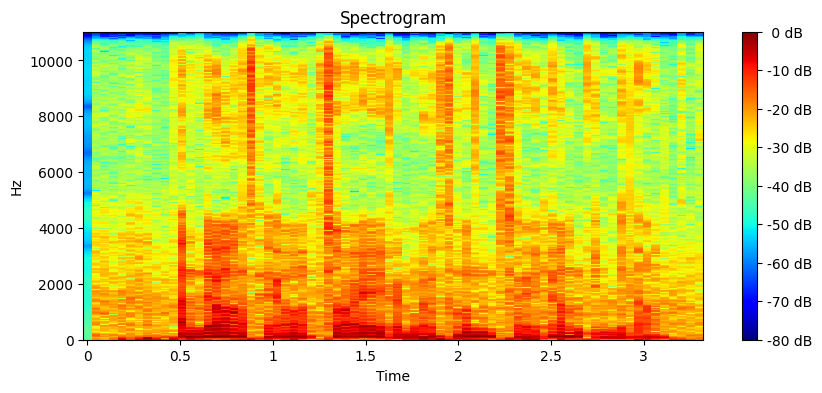

In [6]:
# 스펙트로그램 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, y_axis='linear', x_axis='time', cmap=cm.jet)
plt.colorbar(format='%2.0f dB')
plt.title('Spectrogram')
plt.show()